In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix

In [18]:
df = pd.read_csv('../data/processed_data_with_anomaly.csv')

In [19]:
features = ['Lag_1_Status', 'Count_Alpa_7D', 'Count_Alpa_30D', 'Streak_Alpa', 'Avg_Arrival_Time_7D', 'DayOfWeek']
le = LabelEncoder()

X = df[features]
# Encode 'Lag_1_Status' in the features
X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))

y = le.fit_transform(df['note'].astype(str))

/tmp/ipykernel_156432/3542950029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))


In [20]:
# 80% train-test split

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Data Latih: {X_train.shape[0]} baris")
print(f"Data Uji: {X_test.shape[0]} baris")

Data Latih: 89658 baris
Data Uji: 22415 baris


In [21]:
model_rf = RandomForestClassifier(random_state=42, max_depth=7, max_features=3, min_samples_split=5, n_estimators=50)

In [22]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=3, min_samples_split=5,
                       n_estimators=50, random_state=42)

Count_Alpa_7D: 0.4306
Streak_Alpa: 0.2430
Avg_Arrival_Time_7D: 0.1056
Count_Alpa_30D: 0.0877
Lag_1_Status: 0.0668
DayOfWeek: 0.0662


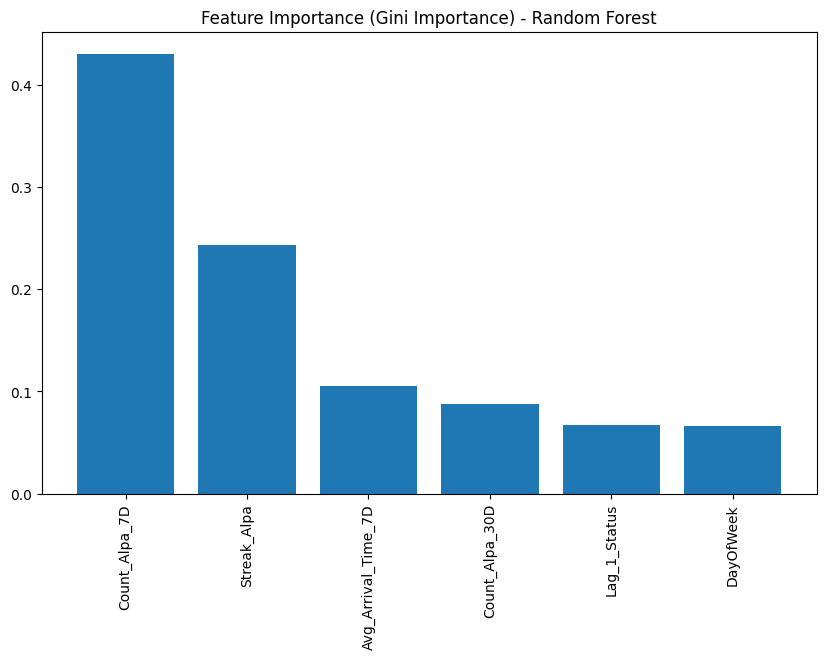

In [23]:
importances = model_rf.feature_importances_
feature_names = X_train.columns

# Urutkan
indices = np.argsort(importances)[::-1]

# Print urutan
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.bar(feature_names[indices], importances[indices])
plt.xticks(rotation=90)
plt.title("Feature Importance (Gini Importance) - Random Forest")
plt.show()


In [24]:
features = ['Count_Alpa_7D', 'Streak_Alpa', 'Avg_Arrival_Time_7D', 'Count_Alpa_30D']
le = LabelEncoder()

X = df[features]

y = le.fit_transform(df['note'].astype(str))

In [25]:
# 80% train-test split

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Data Latih: {X_train.shape[0]} baris")
print(f"Data Uji: {X_test.shape[0]} baris")

Data Latih: 89658 baris
Data Uji: 22415 baris


In [26]:
model_rf = RandomForestClassifier(random_state=42, max_depth=7, max_features=3, min_samples_split=5, n_estimators=50)

In [27]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=3, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [28]:
y_pred = model_rf.predict(X_test)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67     15074
           1       0.42      0.59      0.49      7341

    accuracy                           0.60     22415
   macro avg       0.59      0.60      0.58     22415
weighted avg       0.65      0.60      0.61     22415


Confusion Matrix for Random Forest:


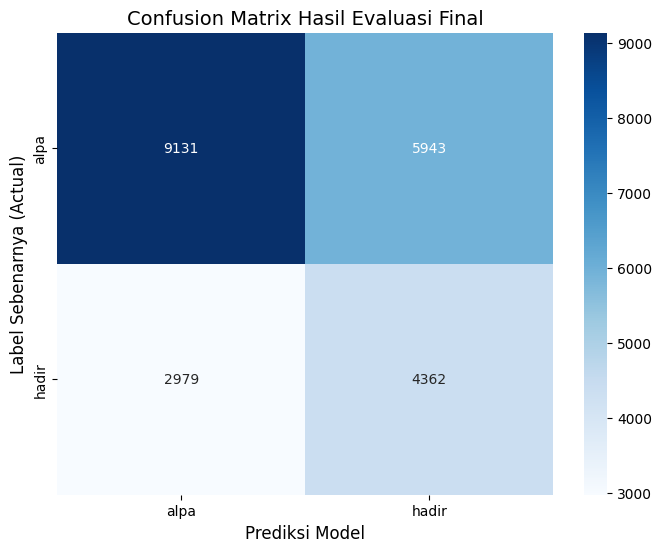

In [30]:
# Print classification report
print(f"\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for Random Forest:")
report = classification_report(y_test, y_pred, output_dict=True)
result = {
    'Model': 'Random Forest',
    'Accuracy': report['accuracy'],
    'Macro F1': report['macro avg']['f1-score'],
    'Macro Recall': report['macro avg']['recall'],
    'Macro Precision': report['macro avg']['precision']
}

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
              xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Actual)', fontsize=12)
plt.title('Confusion Matrix Hasil Evaluasi Final', fontsize=14)
plt.show()

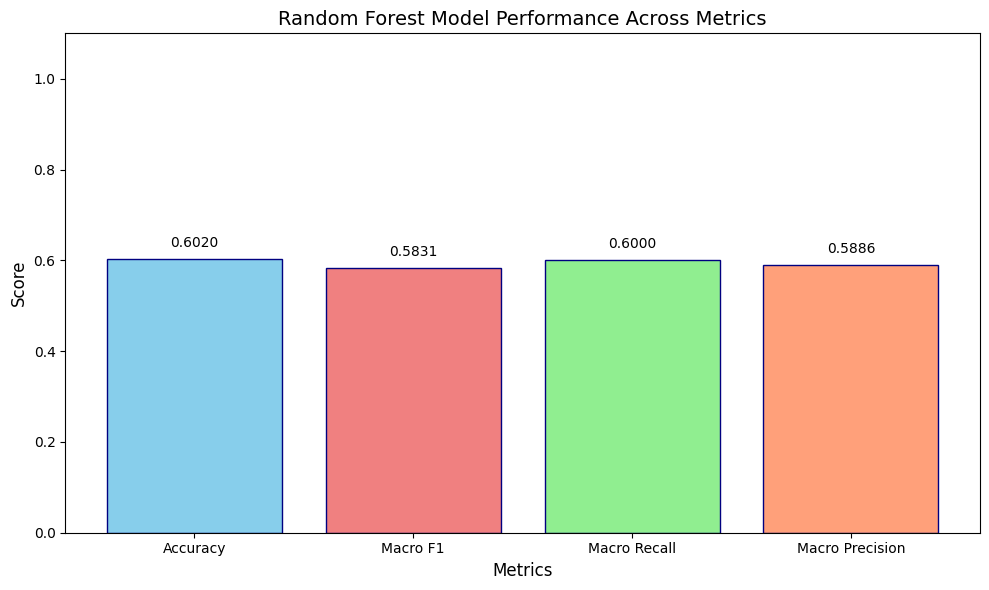

In [31]:
# Visualize metrics for the Random Forest model
metrics_names = ['Accuracy', 'Macro F1', 'Macro Recall', 'Macro Precision']
metrics_values = [result['Accuracy'], result['Macro F1'], result['Macro Recall'], result['Macro Precision']]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'], edgecolor='navy')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.title('Random Forest Model Performance Across Metrics', fontsize=14)
plt.ylim(0, 1.1)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
       f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
